In [1]:
import pandas as pd   # for data manipulation and analysis
import numpy as np  # working with arrays
import seaborn as sns   #for visualization
import scipy as sp
from scipy.stats import chi2

In [2]:
#loading the dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
#the first 5 rows
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#shape of dataset
data.shape

(200, 5)

In [5]:
#statistical summary of dataset
data.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [6]:
data.info()   #some information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isna().any()   #checking for missing values

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
#CustomerID column do not give us any information, so we delete it
data=data.drop('CustomerID', axis=1)

In [9]:
#renaming the columns with long names
data=data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'})

In [10]:
#seeing the change in the dataset
data.head()

,Genre,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
#one-hot encoding the "Genre" column
df=pd.get_dummies(data)
df.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [12]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
num2 = scaler.fit_transform(df)
data = pd.DataFrame(num2, columns = df.columns)
data

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Age,Income,Score,Genre_Female,Genre_Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,1.0,0.0
196,0.519231,0.909836,0.275510,1.0,0.0
197,0.269231,0.909836,0.744898,0.0,1.0
198,0.269231,1.000000,0.173469,0.0,1.0


# DBSCAN Method  

In [13]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters = outlier_detection.fit_predict(data)
data['clusters']=clusters
data['Outlier-DBSCAN'] = np.where(data['clusters']==-1, True, False)
data[data['Outlier-DBSCAN']==True]

,Age,Income,Score,Genre_Female,Genre_Male,clusters,Outlier-DBSCAN
0,0.019231,0.000000,0.387755,0.0,1.0,-1,True
2,0.038462,0.008197,0.051020,1.0,0.0,-1,True
6,0.326923,0.024590,0.051020,1.0,0.0,-1,True
8,0.884615,0.032787,0.020408,0.0,1.0,-1,True
10,0.942308,0.032787,0.132653,0.0,1.0,-1,True
11,0.326923,0.032787,1.000000,1.0,0.0,-1,True
14,0.365385,0.040984,0.122449,0.0,1.0,-1,True
19,0.326923,0.065574,0.989796,1.0,0.0,-1,True
20,0.326923,0.073770,0.346939,0.0,1.0,-1,True
30,0.807692,0.122951,0.030612,0.0,1.0,-1,True


C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


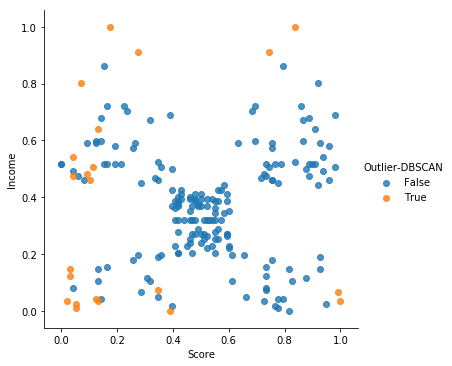

In [17]:
#visualizing outliers detected by DBSCAN
import seaborn as sns
sns.lmplot('Score','Income', data=data, hue='Outlier-DBSCAN', fit_reg=False)

In [18]:
#index of ouliers detected by DBSCAN
DBSCAN_Outlier=data.index[data['Outlier-DBSCAN']==True].tolist()
len(DBSCAN_Outlier)

22

# Isolation Forest  


In [19]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(data)
if_scores = clf.decision_function(data)
if_anomalies=clf.predict(data)
data['Outlier-IsolationForest']=pd.Series(if_anomalies).replace([-1,1],[True,False])
data[data['Outlier-IsolationForest']==True]

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,Age,Income,Score,Genre_Female,Genre_Male,clusters,Outlier-DBSCAN,Outlier-IsolationForest
0,0.019231,0.000000,0.387755,0.0,1.0,-1,True,True
2,0.038462,0.008197,0.051020,1.0,0.0,-1,True,True
6,0.326923,0.024590,0.051020,1.0,0.0,-1,True,True
8,0.884615,0.032787,0.020408,0.0,1.0,-1,True,True
10,0.942308,0.032787,0.132653,0.0,1.0,-1,True,True
11,0.326923,0.032787,1.000000,1.0,0.0,-1,True,True
19,0.326923,0.065574,0.989796,1.0,0.0,-1,True,True
20,0.326923,0.073770,0.346939,0.0,1.0,-1,True,True
30,0.807692,0.122951,0.030612,0.0,1.0,-1,True,True
32,0.673077,0.147541,0.030612,0.0,1.0,-1,True,True


C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


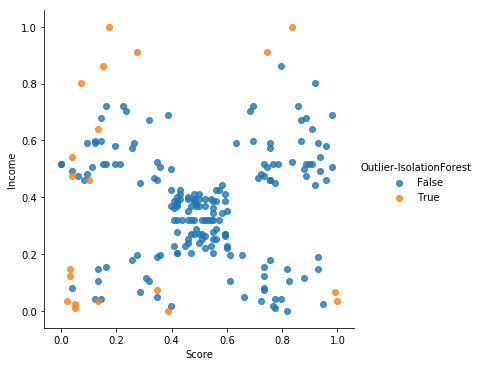

In [21]:
#visualizing outliers detected by Isolation Forest
import seaborn as sns
sns.lmplot('Score','Income', data=data, hue='Outlier-IsolationForest', fit_reg=False)

In [22]:
#index of ouliers detected by Isolation Forest
IsolationForest_Outlier=data.index[data['Outlier-IsolationForest']==True].tolist()
len(DBSCAN_Outlier)

22

# Local Outlier Factor

In [23]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5, contamination=.1)
y_pred = clf.fit_predict(data)
LOF_Scores = clf.negative_outlier_factor_
data['Outlier-LOF']=pd.Series(y_pred).replace([-1,1],[True,False])
data[data['Outlier-LOF']==True]

,Age,Income,Score,Genre_Female,Genre_Male,clusters,Outlier-DBSCAN,Outlier-IsolationForest,Outlier-LOF
4,0.250000,0.016393,0.397959,1.0,0.0,1,False,False,True
6,0.326923,0.024590,0.051020,1.0,0.0,-1,True,True,True
11,0.326923,0.032787,1.000000,1.0,0.0,-1,True,True,True
14,0.365385,0.040984,0.122449,0.0,1.0,-1,True,False,True
18,0.653846,0.065574,0.285714,0.0,1.0,2,False,False,True
19,0.326923,0.065574,0.989796,1.0,0.0,-1,True,True,True
40,0.903846,0.188525,0.346939,1.0,0.0,1,False,False,True
81,0.384615,0.319672,0.551020,0.0,1.0,0,False,False,True
93,0.423077,0.368852,0.397959,1.0,0.0,1,False,False,True
122,0.423077,0.442623,0.581633,1.0,0.0,1,False,False,True


In [24]:
#index of ouliers detected by Local Outlier Factor
LOF_Outlier=data.index[data['Outlier-LOF']==True].tolist()
len(LOF_Outlier)

20

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


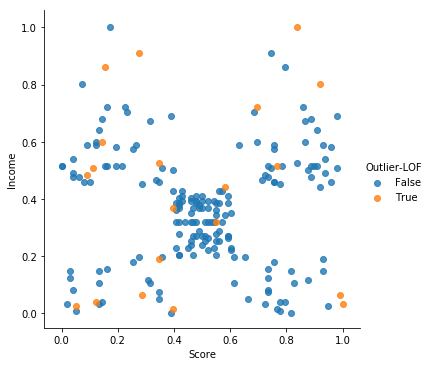

In [25]:
#visualizing outliers detected by Local Outlier Factor
import seaborn as sns
sns.lmplot('Score','Income', data=data, hue='Outlier-LOF', fit_reg=False)


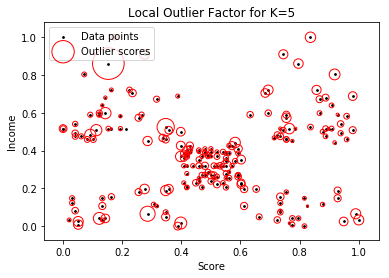

In [26]:
#visualizing outliers according to their LOF_Scores
import matplotlib.pyplot as plt
plt.title('Local Outlier Factor for K=5')
plt.scatter(data['Score'],data['Income'], color='k', s=3., label='Data points')
radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
plt.scatter(data['Score'],data['Income'], s=1000 * radius, edgecolors='r',
facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.ylabel('Income')
plt.xlabel('Score')
legend = plt.legend(loc='upper left')
plt.show();

# Elliptic Envelope


In [27]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=.1,random_state=0)
clf.fit(data)
ee_scores = pd.Series(clf.decision_function(data))
data['Outlier-EllipticEnvelope']=pd.Series(clf.predict(data)).replace([-1,1],[True,False])
data[data['Outlier-EllipticEnvelope']==True]

,Age,Income,Score,Genre_Female,Genre_Male,clusters,Outlier-DBSCAN,Outlier-IsolationForest,Outlier-LOF,Outlier-EllipticEnvelope
0,0.019231,0.000000,0.387755,0.0,1.0,-1,True,True,False,True
14,0.365385,0.040984,0.122449,0.0,1.0,-1,True,False,True,True
20,0.326923,0.073770,0.346939,0.0,1.0,-1,True,True,False,True
134,0.038462,0.475410,0.040816,0.0,1.0,-1,True,True,False,True
136,0.500000,0.475410,0.061224,1.0,0.0,4,False,False,False,True
138,0.019231,0.483607,0.091837,0.0,1.0,-1,True,False,True,True
140,0.750000,0.491803,0.040816,1.0,0.0,4,False,False,False,True
144,0.134615,0.508197,0.112245,0.0,1.0,-1,True,False,True,True
152,0.500000,0.516393,0.193878,1.0,0.0,4,False,False,False,True
154,0.557692,0.516393,0.153061,1.0,0.0,4,False,False,False,True


In [28]:
#index of ouliers detected by Elliptic Envelope
EllipticEnvelope_Outlier=data.index[data['Outlier-EllipticEnvelope']==True].tolist()
len(EllipticEnvelope_Outlier)

20

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


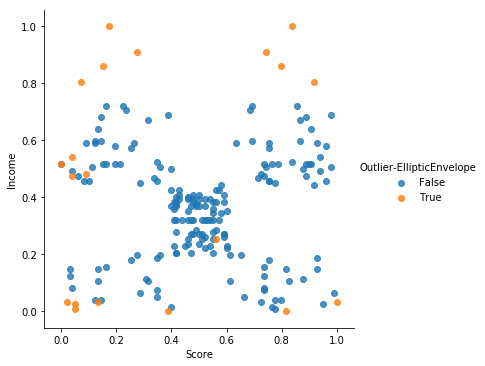

In [231]:
#visualizing outliers detected by Elliptic Envelope
import seaborn as sns
sns.lmplot('Score','Income', data=data, hue='Outlier-EllipticEnvelope', fit_reg=False)
plt.show()

# One-Class Support Vector Machines


In [29]:
from sklearn import svm
clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001)
clf.fit(data)
y_pred=clf.predict(data)
data['Outlier-OCSVM']=pd.Series(y_pred).replace([-1,1],[True,False])
data[data['Outlier-OCSVM']==True]

,Age,Income,Score,Genre_Female,Genre_Male,clusters,Outlier-DBSCAN,Outlier-IsolationForest,Outlier-LOF,Outlier-EllipticEnvelope,Outlier-OCSVM
0,0.019231,0.000000,0.387755,0.0,1.0,-1,True,True,False,True,True
2,0.038462,0.008197,0.051020,1.0,0.0,-1,True,True,False,False,True
6,0.326923,0.024590,0.051020,1.0,0.0,-1,True,True,True,False,True
8,0.884615,0.032787,0.020408,0.0,1.0,-1,True,True,False,False,True
10,0.942308,0.032787,0.132653,0.0,1.0,-1,True,True,False,False,True
11,0.326923,0.032787,1.000000,1.0,0.0,-1,True,True,True,False,True
14,0.365385,0.040984,0.122449,0.0,1.0,-1,True,False,True,True,True
19,0.326923,0.065574,0.989796,1.0,0.0,-1,True,True,True,False,True
20,0.326923,0.073770,0.346939,0.0,1.0,-1,True,True,False,True,True
30,0.807692,0.122951,0.030612,0.0,1.0,-1,True,True,False,False,True


In [30]:
#index of ouliers detected by One-Class Support Vector Machines
OCSVM_Outlier=data.index[data['Outlier-OCSVM']==True].tolist()
len(OCSVM_Outlier)

41

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


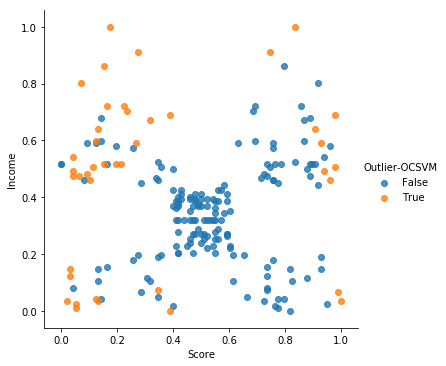

In [32]:
#visualizing outliers detected by One-Class Support Vector Machines
import seaborn as sns
sns.lmplot('Score','Income', data=data, hue='Outlier-OCSVM', fit_reg=False)
plt.show()

# Angle-based Outlier Detector (ABOD)

In [31]:
from pyod.models.abod import ABOD
clf=ABOD(contamination=0.1)
clf.fit(data)
scores_pred = clf.decision_function(data) * -1
y_pred = clf.predict(data)
data['Outlier-ABOD']=pd.Series(y_pred).replace([1,0],[True,False])
data[data['Outlier-ABOD']==True]

,Age,Income,Score,Genre_Female,Genre_Male,clusters,Outlier-DBSCAN,Outlier-IsolationForest,Outlier-LOF,Outlier-EllipticEnvelope,Outlier-OCSVM,Outlier-ABOD
0,0.019231,0.000000,0.387755,0.0,1.0,-1,True,True,False,True,True,True
2,0.038462,0.008197,0.051020,1.0,0.0,-1,True,True,False,False,True,True
4,0.250000,0.016393,0.397959,1.0,0.0,1,False,False,True,False,False,True
6,0.326923,0.024590,0.051020,1.0,0.0,-1,True,True,True,False,True,True
7,0.096154,0.024590,0.948980,1.0,0.0,1,False,False,False,False,False,True
14,0.365385,0.040984,0.122449,0.0,1.0,-1,True,False,True,True,True,True
18,0.653846,0.065574,0.285714,0.0,1.0,2,False,False,True,False,False,True
20,0.326923,0.073770,0.346939,0.0,1.0,-1,True,True,False,True,True,True
40,0.903846,0.188525,0.346939,1.0,0.0,1,False,False,True,False,False,True
81,0.384615,0.319672,0.551020,0.0,1.0,0,False,False,True,False,False,True


In [33]:
#index of ouliers detected by Angle-based Outlier Detector (ABOD)
ABOD_Outlier=data.index[data['Outlier-ABOD']==True].tolist()
len(ABOD_Outlier)

22

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


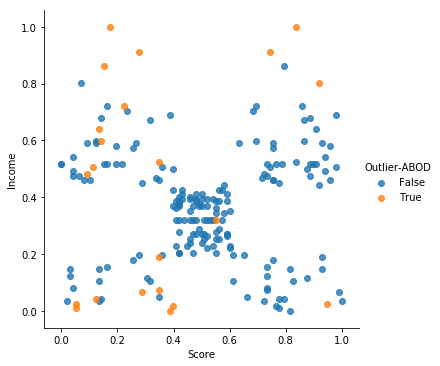

In [34]:
#visualizing outliers detected by One-Class Support Vector Machines
import seaborn as sns
sns.lmplot('Score','Income', data=data, hue='Outlier-ABOD', fit_reg=False)
plt.show()

# Outliers Detected By all Methods


In [39]:
data.iloc[:,6:]

,Outlier-DBSCAN,Outlier-IsolationForest,Outlier-LOF,Outlier-EllipticEnvelope,Outlier-OCSVM,Outlier-ABOD
0,True,True,False,True,True,True
1,False,False,False,False,False,False
2,True,True,False,False,True,True
3,False,False,False,False,False,False
4,False,False,True,False,False,True
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,True,True,True,False,True,True
197,True,True,False,True,True,True
198,True,True,False,True,True,True


In [56]:
#observations that are detected outlier by all methods above
data[(data["Outlier-DBSCAN"]==True) & (data["Outlier-IsolationForest"]==True) & (data['Outlier-LOF']==True) & 
     (data['Outlier-EllipticEnvelope']==True) & (data['Outlier-OCSVM']==True) & (data['Outlier-ABOD']==True)]

,Age,Income,Score,Genre_Female,Genre_Male,clusters,Outlier-DBSCAN,Outlier-IsolationForest,Outlier-LOF,Outlier-EllipticEnvelope,Outlier-OCSVM,Outlier-ABOD
199,0.230769,1.0,0.836735,0.0,1.0,-1,True,True,True,True,True,True
